In [1]:
import matplotlib
from matplotlib import rc
rc('text',usetex=True)
rc('text.latex', preamble=r'\usepackage{color}')
#import matplotlib as mpl
#mpl.rcParams.update(mpl.rcParamsDefault)

#import matplotlib as matplotlib
#matplotlib.use('pgf')
#matplotlib.rc('pgf', texsystem='pdflatex')  # from running latex -v
#preamble = matplotlib.rcParams.setdefault('pgf.preamble', [])
#preamble=r'\usepackage{color}'


import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

import pandas as pd
import numpy as np
import math

import json
from os import listdir
from os.path import isfile, join
import sys
import glob
import graph_tool.all as gt
from datetime import datetime, date, time


statistics_dir = '/home/maniaa/ashes/code/statistics/'
stat_csv = [(statistics_dir + f) for f in listdir(statistics_dir) if (f.endswith(".csv") and isfile(join(statistics_dir, f)))]
stat_csv.sort()
stat_csv = stat_csv[1:]

/home/maniaa/ashes/code/statistics/08-02-2018.csv
             Single job  2 < DAGsize < 5  DAGsize > 5            1jis  \
input_group                                                             
0                  1217             2308           31        88369717   
1                  7527               25           16    366759342869   
2                   244               72          100    124911512505   
3                    89               19           37   1042599917474   
4                    23               39           39   2201240638569   
5                    26               15           26  18868890580354   
6                     2                3           32  23398906639526   

                    2<5jis             jis5  
input_group                                  
0                 19944271          4315037  
1                429828373        627920051  
2              49311206810      48845547398  
3             169531226372     420188646042  
4            430

             Single job  2 < DAGsize < 5  DAGsize > 5            1jis  \
input_group                                                             
0                  1327             2381           16       100854582   
1                  8676                7           16    396732070919   
2                   223               59           63    108490797256   
3                    60               24           26    609462726591   
4                     7                6           24    850375418875   
5                    21               18           11  13672250961561   
6                     2               13           22   7378580334477   

                     2<5jis             jis5  
input_group                                   
0                  19589607          2466631  
1                 162226284        365480332  
2               32299219976      30255166064  
3              246566191649     335250654997  
4             1212888800570    3399181014282  
5            

             Single job  2 < DAGsize < 5  DAGsize > 5            1jis  \
input_group                                                             
0                  1217             2375           21        87168121   
1                  7960               11           17    364715569432   
2                   214               59           69    105329238318   
3                    73               17           31    611634104256   
4                     4                2           22    252939819435   
5                    14                5           13  10191585464919   

                    2<5jis           jis5  
input_group                                
0                 17312138        3457768  
1                380749067      605542951  
2              33341667203    31840954099  
3             170688698710   368510968296  
4             420122112438  2706202069653  
5            3519834845102  8883804606029  
/home/maniaa/ashes/code/statistics/08-19-2018.csv
             

/home/maniaa/.local/lib/python3.6/site-packages/ipykernel_launcher.py:162: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


             Single job  2 < DAGsize < 5  DAGsize > 5            1jis  \
input_group                                                             
0                  1184             2145           41        92233836   
1                  6493               18           62    304086692734   
2                   259               77          105    149258226576   
3                    59               40           67    589947312488   
4                    42               40           53   3827317204794   
5                    20                7          128  15497733017562   
6                     5                2           26  33194600459791   

                    2<5jis             jis5  
input_group                                  
0                 15606738          4692164  
1                661466519       2225753937  
2              50187812281      67089628118  
3             445420331801     830864799677  
4            4662791512684    5294480910519  
5            4479795

             Single job  2 < DAGsize < 5  DAGsize > 5            1jis  \
input_group                                                             
0                  1254           2233.0           17        99433518   
1                  8005             13.0           20    374716694271   
2                   239             68.0           77    113953305266   
3                    65             26.0           32    699822971129   
4                    10              8.0           27   1518235662800   
5                    35              6.0           14  25983824012551   
6                     1              1.0           27   4520366246491   

                   2<5jis             jis5  
input_group                                 
0            1.625941e+07          2360346  
1            5.146432e+08        652577680  
2            3.834251e+10      41184795092  
3            2.096792e+11     407648024455  
4            1.408144e+12    3151130103288  
5            4.028482e+12  

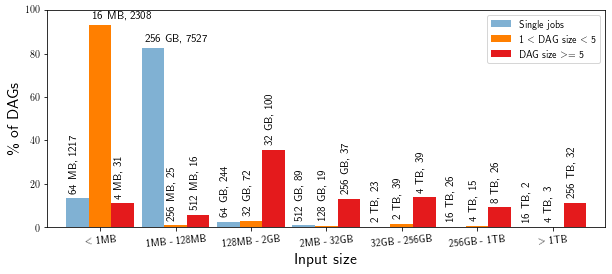

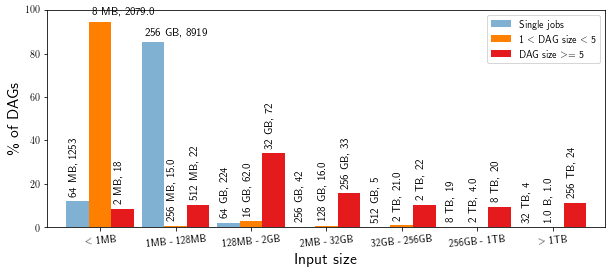

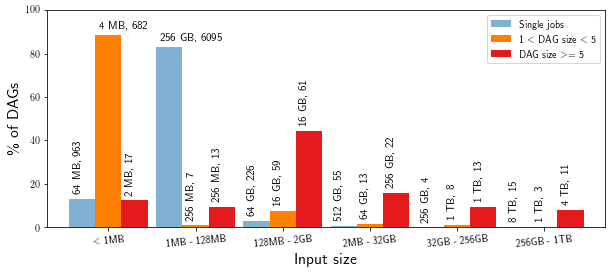

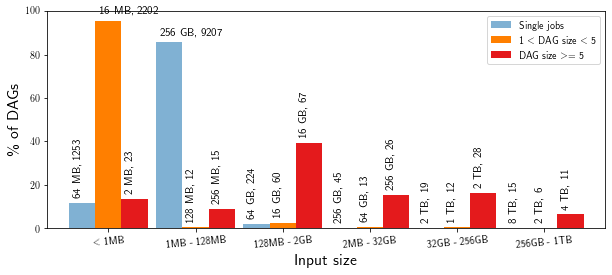

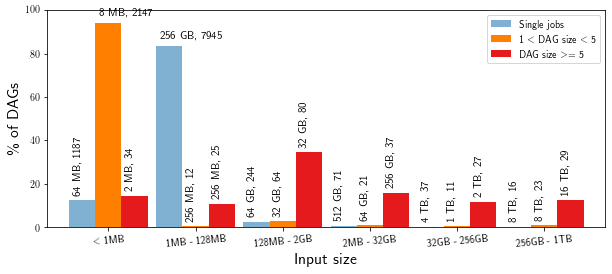

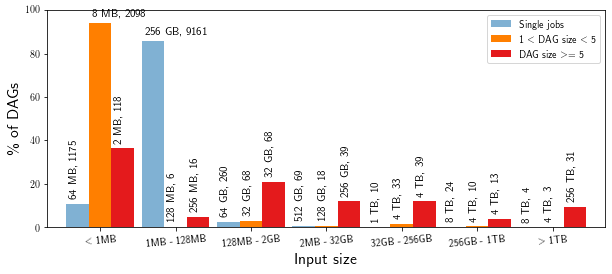

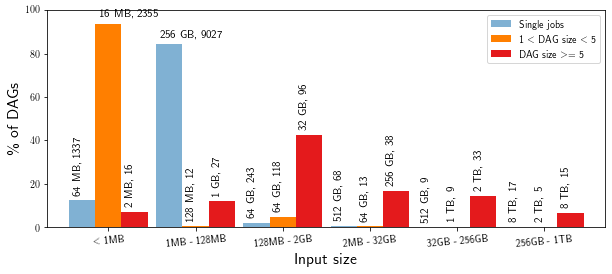

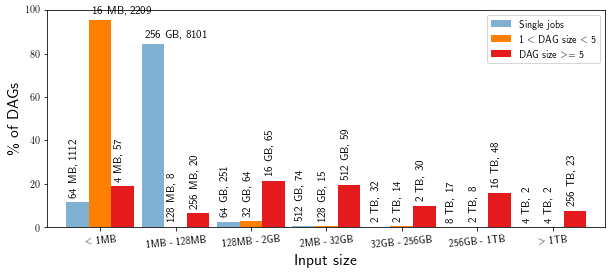

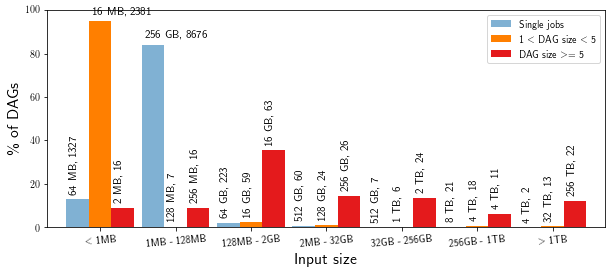

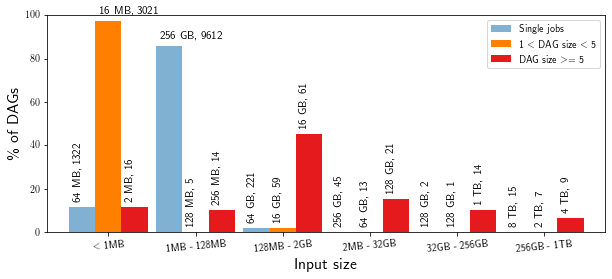

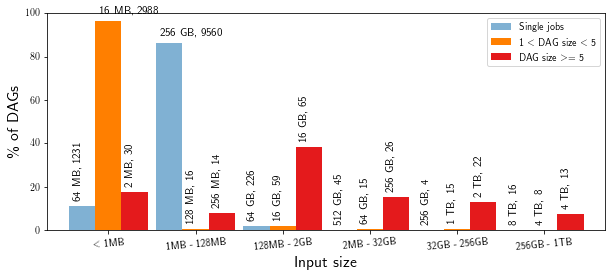

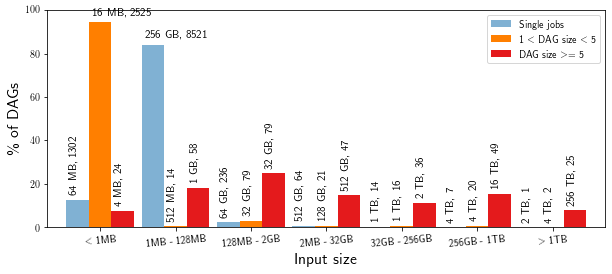

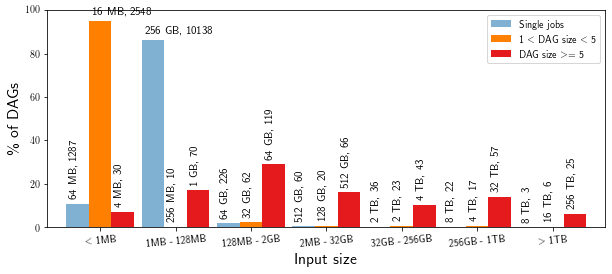

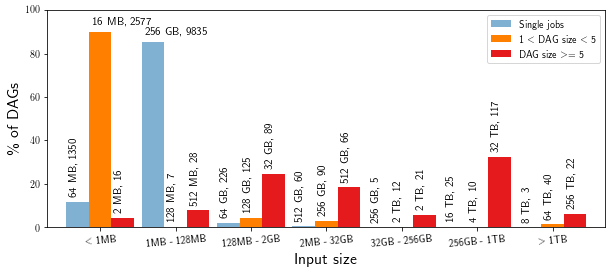

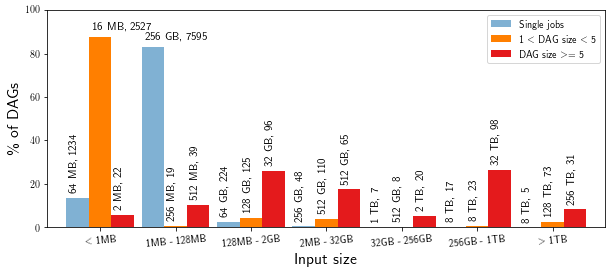

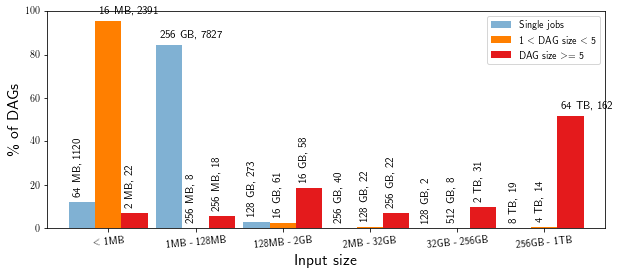

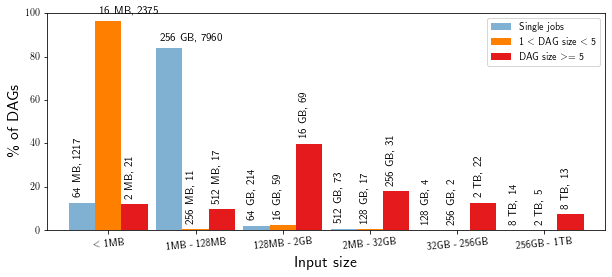

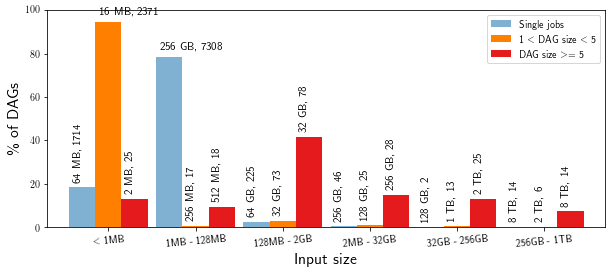

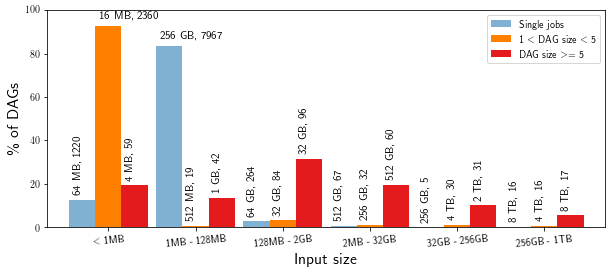

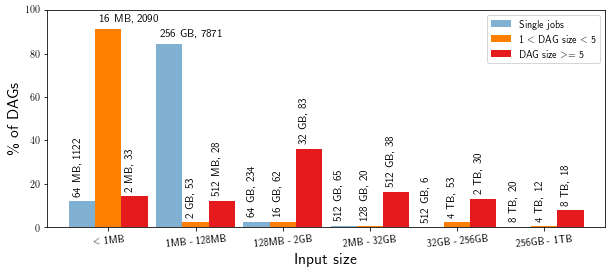

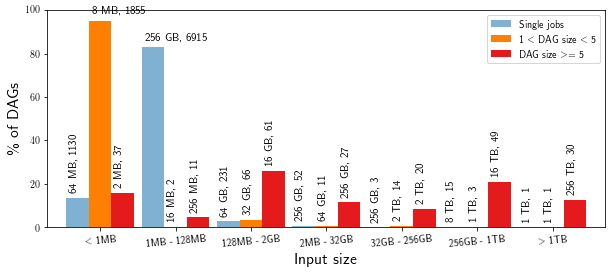

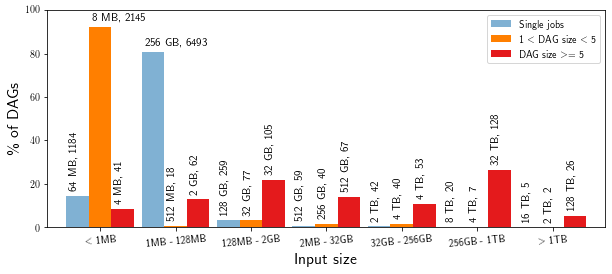

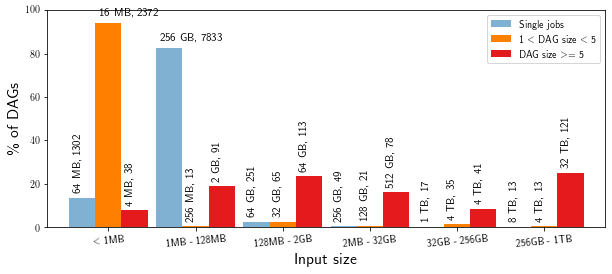

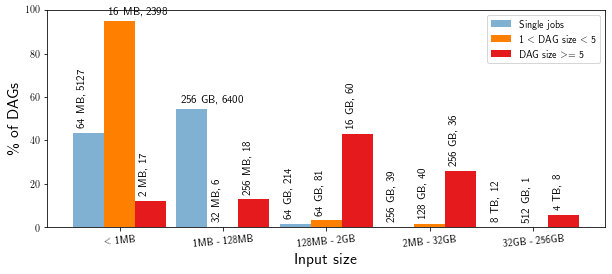

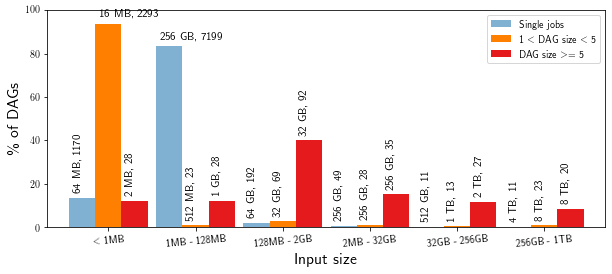

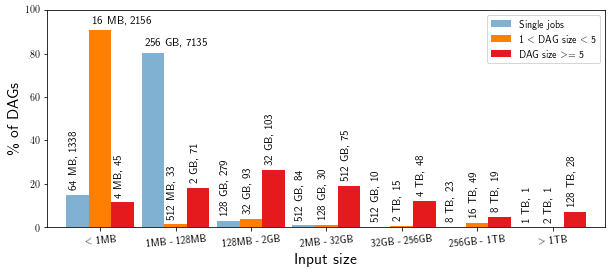

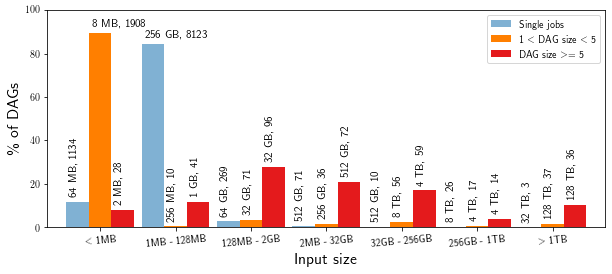

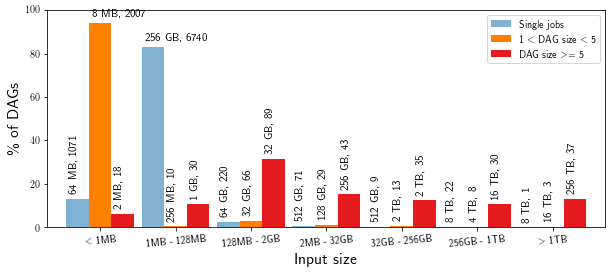

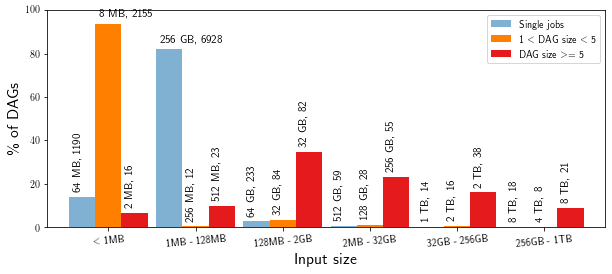

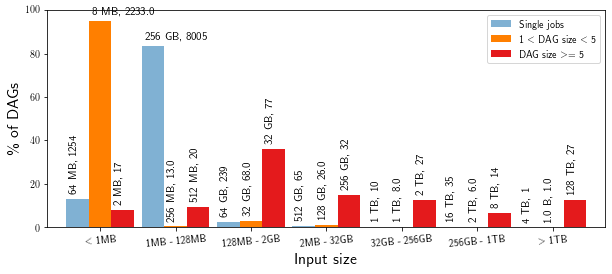

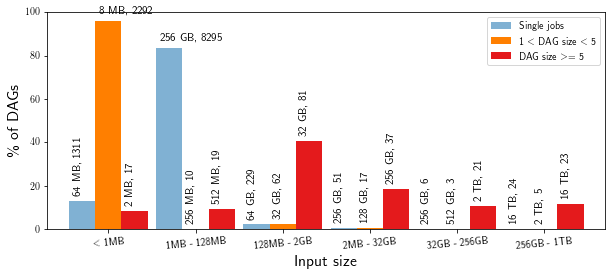

In [10]:
# for multiple 
def format_xticks10min(x, pos=None):
    hour = (int(x)*600)//3600
    daytime = ''
    if 0 <= hour and hour < 7:
        daytime = 'AM'
        hour += 7;
    elif hour == 7:
        daytime = 'PM'
        hour += 7;
    elif 7 < hour and hour < 19:
        daytime = 'PM'
        hour -= 5;
    elif hour == 19:
        daytime = 'AM'
        hour -= 5;
    elif 19 < hour and hour <= 24:
        daytime = 'AM'
        hour -= 17;
    return str(hour) + daytime

def build_graph(data):
    gstr = data['workflow.dag']
    wrk_edges = [e.split('>') for e in gstr.split(',')]
    lbl_vid = {}
    graph = {'nodes': {}, 'edges': []}
    g = gt.Graph(directed=True)
    v_lbl = g.new_vertex_property("int")
    for e in wrk_edges:
        srclbl = int(e[0].split('-')[1])
        if srclbl not in lbl_vid:
            vsrc = g.add_vertex()
            v_lbl[vsrc] = srclbl
            lbl_vid[srclbl] = int(vsrc)
            
        if len(e) > 1:
            trgtlbl = int(e[1].split('-')[1])
            if trgtlbl not in lbl_vid:
                vtgt = g.add_vertex()
                v_lbl[vtgt] = trgtlbl
                lbl_vid[trgtlbl] = int(vtgt)
            g.add_edge(lbl_vid[srclbl], lbl_vid[trgtlbl])
   
    g.vertex_properties['label'] = v_lbl
    data['dag_nv'] = g.num_vertices()
    data['dag_ne'] = g.num_edges()
    return data

def dag_size_per_timebin(group):
    global dag_submission_stats
    n_1j = len(group[group['dag_nv'] == 1])
    n_2t5j = len(group[(group['dag_nv'] > 2) & (group['dag_nv'] <= 5)])
    n_10j = len(group[group['dag_nv'] > 5])
    dag_submission_stats.append({'submit_10min': int(group['submit_10min'].max()), 
                                 '1': n_1j, '2<5': n_2t5j, '>5': n_10j})
    
    io_sz_1j = group[group['dag_nv'] == 1]['HDFS_INPUT_SIZE'].sum()
    io_sz_2t5j = group[(group['dag_nv'] > 2) & (group['dag_nv'] <= 5)]['HDFS_INPUT_SIZE'].sum()
    io_sz_10j = group[group['dag_nv'] > 5]['HDFS_INPUT_SIZE'].sum()
    dag_submission_iosize.append({'submit_10min': int(group['submit_10min'].max()), 
                                 '1': io_sz_1j, '2<5': io_sz_2t5j, '>5': io_sz_10j})



def input_size_group(size):
    if size < 1: return 0;
    
    log = math.log2(int(size));
    if log < 20: # < 1M
        return 0;
    
    if log >= 20 and log < 27: # 1M - 128M
        return 1;
    
    if log >= 27 and log < 31: # 128M - 2G
        return 2;
    
    if log >= 31 and log < 35: # 2G - 32G
        return 3;
    
    if log >= 35 and log < 38: # 32G - 256G
        return 4;
    
    if log >= 38 and log < 40: # 256G-1T
        return 5;
    
    return 6; # log >= 40 (1T)

    
def tame_io_sizes(group, job_sz_io_sz):
    job_sz_io_sz.append({'input_size': group['HDFS_INPUT_SIZE'].sum(), 
                        'input_group': input_size_group(group['HDFS_INPUT_SIZE'].sum()),
                        'dag_size': group['dag_nv'].max(),
                        'submit_ts': group['submit_10min'].min()})

    
def format_xticks_iosize(x, pos=None):
    index_to_size = {0: r'$<$ 1MB', 1: '1MB - 128MB',
                    2: '128MB - 2GB', 3: '2MB - 32GB',
                    4: '32GB - 256GB', 5: '256GB - 1TB',
                    6: r'$>$ 1TB',}
    return index_to_size[x]

def format_annotation(size):
    log = int(math.log2(size))
    if log < 10:
        return str(size) + ' B'
    if log >= 10 and log < 20:
        return str(2**(log - 10)) + ' KB'
    if log >= 20 and log < 30:
        return str(2**(log - 20)) + ' MB'
    if log >= 30 and log < 40:
        return str(2**(log - 30)) + ' GB'
    if log >= 40:
        return str(2**(log - 40)) + ' TB'
    return str(size)

def rotation(height):
    if height > 50:
        return 0
    return 90;


dag_submission_stats = []
dag_submission_iosize = []
for index, f in enumerate(stat_csv):
    print(f) # 6Am of each day
    month, day, year = f.split('/')[-1].split('.csv')[0].split('-')
    trace_starttime = datetime.combine(date(int(year), int(month), int(day)), time(7, 0))
    
    df = pd.read_csv(f)
    df = df[df['submitTime']/1000 > datetime.timestamp(trace_starttime)]
    df = df[df['state'] == 'SUCCEEDED']
    df['submit_ts'] = df['submitTime']//1000 - datetime.timestamp(trace_starttime);
    df['submit_10min'] = df['submit_ts']//(10*60); 
    df.sort_values('submit_ts', inplace=True)
    df.reset_index(inplace=True)
    df = df.apply(build_graph, axis=1)
    df.groupby('submit_10min').apply(dag_size_per_timebin)
    
    job_sz_io_sz = [];  
    df.groupby('workflow.id').apply(tame_io_sizes, job_sz_io_sz)

    js_is_df = pd.DataFrame(job_sz_io_sz)
    jsg_df = pd.DataFrame();
    jsg_df['Single job'] = js_is_df[js_is_df['dag_size'] == 1].groupby('input_group')['dag_size'].agg('count')
    jsg_df['2 < DAGsize < 5'] = js_is_df[(js_is_df['dag_size'] > 1) & (js_is_df['dag_size'] < 5)].groupby('input_group')['dag_size'].agg('count')
    jsg_df['DAGsize > 5'] = js_is_df[js_is_df['dag_size'] >= 5 ].groupby('input_group')['dag_size'].agg('count')
    jsg_df['1jis'] = js_is_df[js_is_df['dag_size'] == 1].groupby('input_group')['input_size'].agg('sum')
    jsg_df['2<5jis'] = js_is_df[(js_is_df['dag_size'] > 1) & (js_is_df['dag_size'] < 5)].groupby('input_group')['input_size'].agg('sum')
    jsg_df['jis5'] = js_is_df[js_is_df['dag_size'] >= 5 ].groupby('input_group')['input_size'].agg('sum')
    jsg_df.fillna(1, inplace=True)

    print(jsg_df) 

    single, j25, j5, s1, s2, s3 = jsg_df.sum()
    jsg_df['Single jobs'] = 100*jsg_df['Single job']/single
    jsg_df['2 < DAG size < 5'] = 100*jsg_df['2 < DAGsize < 5']/j25
    jsg_df['DAG size > 5'] = 100*jsg_df['DAGsize > 5']/j5

    colors = ['#80b1d3', '#ff7f00', '#e41a1c']
    fig, ax = plt.subplots(figsize=(10,4))
    jsg_df[['Single jobs', '2 < DAG size < 5', 'DAG size > 5']].plot.bar(ax=ax, color=colors, width=0.9)
    plt.xticks(rotation=5)
    ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_xticks_iosize))
    ax.set_ylim([0,100])
    #ax.set_yscale('log')
    plt.xlabel("Input size", fontsize=16)
    plt.ylabel(r'\% of DAGs', fontsize=16)
    plt.legend([r'Single jobs', r'1 $<$ DAG size $<$ 5', r'DAG size $>=$ 5'])

    
    
    # set individual bar lables using above list
    for idx, i in enumerate(ax.patches):
        ax.text(i.get_x()+.04, i.get_height()+3, 
                r'{\textcolor{blue}{' + format_annotation(jsg_df.iloc[idx%len(jsg_df), 3 + (idx//len(jsg_df))]) + r'}}' \
                + ', ' + r'{\textcolor{red}{' + str(jsg_df.iloc[idx%len(jsg_df), (idx//len(jsg_df))]) + r'}}',
                fontsize=11, rotation=rotation(i.get_height()))

    
    if index == 30:
        break



In [8]:
dm = pd.DataFrame(dag_submission_stats)
ds = pd.DataFrame(dag_submission_iosize)
ds['1'].min(),ds['2<5'].min(),ds['>5'].min() 

(61477782, 43248, 0)

In [12]:
ds

,submit_10min,1,2<5,>5
0,0,641145943,149724456136,102295498906
1,1,653664834,11223901022,85914695340
2,2,4200539847,298512124834,1081165770453
3,3,7590372697,21113207448,1250262093006
4,4,679092278,100940,465088783
...,...,...,...,...
139,139,31787335189,108150,0
140,140,10554366966,6266994669,137383337
141,141,690434045,115354,36588764872
142,142,726208453,122558,0


/home/maniaa/ashes/code/statistics/08-02-2018.csv
/home/maniaa/ashes/code/statistics/08-03-2018.csv
/home/maniaa/ashes/code/statistics/08-04-2018.csv
/home/maniaa/ashes/code/statistics/08-05-2018.csv
/home/maniaa/ashes/code/statistics/08-06-2018.csv
/home/maniaa/ashes/code/statistics/08-07-2018.csv
/home/maniaa/ashes/code/statistics/08-08-2018.csv
/home/maniaa/ashes/code/statistics/08-09-2018.csv
/home/maniaa/ashes/code/statistics/08-10-2018.csv
/home/maniaa/ashes/code/statistics/08-11-2018.csv
/home/maniaa/ashes/code/statistics/08-12-2018.csv
/home/maniaa/ashes/code/statistics/08-13-2018.csv
/home/maniaa/ashes/code/statistics/08-14-2018.csv
/home/maniaa/ashes/code/statistics/08-15-2018.csv
/home/maniaa/ashes/code/statistics/08-16-2018.csv
/home/maniaa/ashes/code/statistics/08-17-2018.csv
/home/maniaa/ashes/code/statistics/08-18-2018.csv
/home/maniaa/ashes/code/statistics/08-19-2018.csv
/home/maniaa/ashes/code/statistics/08-20-2018.csv
/home/maniaa/ashes/code/statistics/08-21-2018.csv


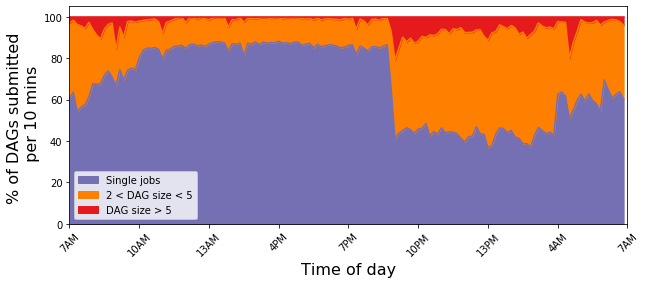

In [209]:
dt = dm.groupby('submit_10min')[['1', '2<5', '>5']].agg('sum')
dt['total'] = dt['1'] + dt['2<5'] + dt['>5']
dt['Single jobs'] = 100*dt['1']/dt['total']
dt['2 < DAG size < 5'] = 100*dt['2<5']/dt['total']
dt['DAG size > 5'] = 100*dt['>5']/dt['total']

colors = ['#80b1d3', '#ff7f00', '#e41a1c']
fig, ax = plt.subplots(figsize=(8,4))
dt[['Single jobs', '2 < DAG size < 5', 'DAG size > 5']].plot.area(ax=ax, color=colors, stacked=True);
plt.xticks(np.arange(0, 146, 18), rotation=45)
ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_xticks10min))
plt.xlabel("Time of day (30 days)", fontsize=16)
plt.ylabel("% of DAGs size \n per 10 mins", fontsize=16)
plt.legend()
plt.subplots_adjust(left=0.1, bottom=0.2, right=0.96, top=0.97)
fig.savefig('/home/maniaa/ashes/drawings/fig_dagsizeper10min.pdf', format='pdf', dpi=200)
fig.savefig('/home/maniaa/ashes/drawings/fig_dagsizeper10min.png', format='png', dpi=200)
plt.show()


In [218]:
dt.to_csv('/home/maniaa/ashes/dag_size_distribution_per_10min.csv')

/home/maniaa/ashes/code/statistics/08-02-2018.csv
/home/maniaa/ashes/code/statistics/08-03-2018.csv
/home/maniaa/ashes/code/statistics/08-04-2018.csv
/home/maniaa/ashes/code/statistics/08-05-2018.csv
/home/maniaa/ashes/code/statistics/08-06-2018.csv
/home/maniaa/ashes/code/statistics/08-07-2018.csv
/home/maniaa/ashes/code/statistics/08-08-2018.csv
/home/maniaa/ashes/code/statistics/08-09-2018.csv
/home/maniaa/ashes/code/statistics/08-10-2018.csv
/home/maniaa/ashes/code/statistics/08-11-2018.csv
/home/maniaa/ashes/code/statistics/08-12-2018.csv
/home/maniaa/ashes/code/statistics/08-13-2018.csv
/home/maniaa/ashes/code/statistics/08-14-2018.csv
/home/maniaa/ashes/code/statistics/08-15-2018.csv
/home/maniaa/ashes/code/statistics/08-16-2018.csv
/home/maniaa/ashes/code/statistics/08-17-2018.csv
/home/maniaa/ashes/code/statistics/08-18-2018.csv
/home/maniaa/ashes/code/statistics/08-19-2018.csv
/home/maniaa/ashes/code/statistics/08-20-2018.csv
/home/maniaa/ashes/code/statistics/08-21-2018.csv


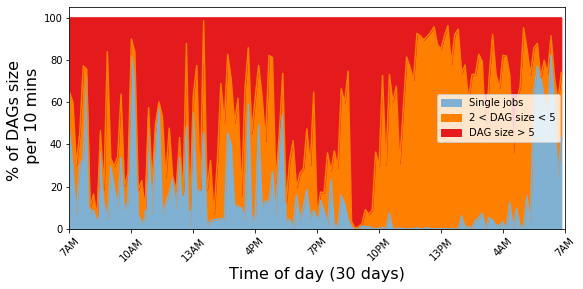

In [236]:
# job size which is number of mappers + number of reducers

#def query_io_size_iobin(group):
#    global dag_submission_iosize
    

dag_submission_stats = []
dag_submission_iosize = []
for index, f in enumerate(stat_csv):
    print(f) # 6Am of each day
    month, day, year = f.split('/')[-1].split('.csv')[0].split('-')
    trace_starttime = datetime.combine(date(int(year), int(month), int(day)), time(7, 0))
    
    df = pd.read_csv(f)
    df = df[df['submitTime']/1000 > datetime.timestamp(trace_starttime)]
    df = df[df['state'] == 'SUCCEEDED']
    df['submit_ts'] = df['submitTime']//1000 - datetime.timestamp(trace_starttime);
    df['submit_10min'] = df['submit_ts']//(10*60); 
    df.sort_values('submit_ts', inplace=True)
    df.reset_index(inplace=True)
    df = df.apply(build_graph, axis=1)
    df.groupby('submit_10min').apply(dag_size_per_timebin)
    
    if index == 30:
        break

dt = pd.DataFrame(dag_submission_iosize).groupby('submit_10min')[['1', '2<5', '>5']].agg('sum')
dt['total'] = dt['1'] + dt['2<5'] + dt['>5']
dt['Single jobs'] = 100*dt['1']/dt['total']
dt['2 < DAG size < 5'] = 100*dt['2<5']/dt['total']
dt['DAG size > 5'] = 100*dt['>5']/dt['total']

colors = ['#80b1d3', '#ff7f00', '#e41a1c']
fig, ax = plt.subplots(figsize=(8,4))
dt[['Single jobs', '2 < DAG size < 5', 'DAG size > 5']].plot.area(ax=ax, color=colors, stacked=True);
plt.xticks(np.arange(0, 146, 18), rotation=45)
ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_xticks10min))
plt.xlabel("Time of day (30 days)", fontsize=16)
plt.ylabel("% of DAGs size \n per 10 mins", fontsize=16)
plt.legend()
plt.subplots_adjust(left=0.1, bottom=0.2, right=0.96, top=0.97)
fig.savefig('/home/maniaa/ashes/drawings/fig_dagiosizeper10min.pdf', format='pdf', dpi=200)
fig.savefig('/home/maniaa/ashes/drawings/fig_dagiosizeper10min.png', format='png', dpi=200)
plt.show()


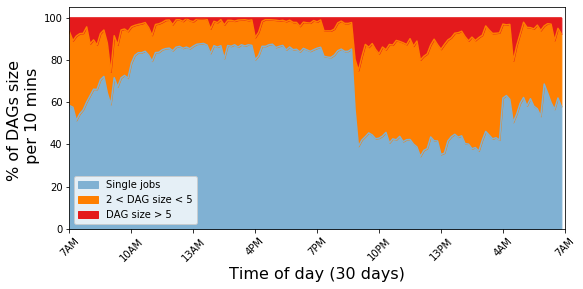

In [237]:
dt = pd.DataFrame(dag_submission_stats).groupby('submit_10min')[['1', '2<5', '>5']].agg('sum')
dt['total'] = dt['1'] + dt['2<5'] + dt['>5']
dt['Single jobs'] = 100*dt['1']/dt['total']
dt['2 < DAG size < 5'] = 100*dt['2<5']/dt['total']
dt['DAG size > 5'] = 100*dt['>5']/dt['total']

colors = ['#80b1d3', '#ff7f00', '#e41a1c']
fig, ax = plt.subplots(figsize=(8,4))
dt[['Single jobs', '2 < DAG size < 5', 'DAG size > 5']].plot.area(ax=ax, color=colors, stacked=True);
plt.xticks(np.arange(0, 146, 18), rotation=45)
ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_xticks10min))
plt.xlabel("Time of day (30 days)", fontsize=16)
plt.ylabel("% of DAGs size \n per 10 mins", fontsize=16)
plt.legend()
plt.subplots_adjust(left=0.1, bottom=0.2, right=0.96, top=0.97)
fig.savefig('/home/maniaa/ashes/drawings/fig_dagsizeper10min.pdf', format='pdf', dpi=200)
fig.savefig('/home/maniaa/ashes/drawings/fig_dagsizeper10min.png', format='png', dpi=200)
plt.show()

/home/maniaa/ashes/code/statistics/08-02-2018.csv


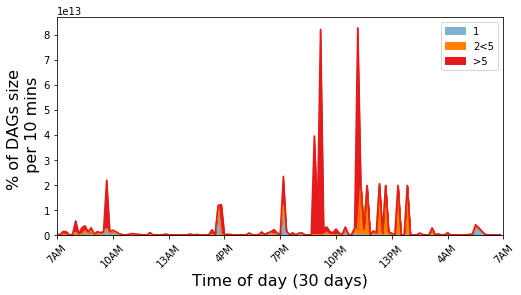

,1,2<5,>5,total,Single jobs,2 < DAG size < 5,DAG size > 5
submit_10min,,,,,,,
0,641145943,149724456136,102295498906,252661100985,0.253757,59.259006,40.487237
1,653664834,11223901022,85914695340,97792261196,0.668422,11.477290,87.854289
2,4200539847,298512124834,1081165770453,1383878435134,0.303534,21.570690,78.125776
3,7590372697,21113207448,1250262093006,1278965673151,0.593477,1.650803,97.755719
4,679092278,100940,465088783,1144282001,59.346584,0.008821,40.644595
...,...,...,...,...,...,...,...
139,31787335189,108150,0,31787443339,99.999660,0.000340,0.000000
140,10554366966,6266994669,137383337,16958744972,62.235543,36.954354,0.810103
141,690434045,115354,36588764872,37279314271,1.852057,0.000309,98.147634


In [247]:
# job size which is number of mappers + number of reducers
def format_xticks10min(x, pos=None):
    hour = (int(x)*600)//3600
    daytime = ''
    if 0 <= hour and hour < 7:
        daytime = 'AM'
        hour += 7;
    elif hour == 7:
        daytime = 'PM'
        hour += 7;
    elif 7 < hour and hour < 19:
        daytime = 'PM'
        hour -= 5;
    elif hour == 19:
        daytime = 'AM'
        hour -= 5;
    elif 19 < hour and hour <= 24:
        daytime = 'AM'
        hour -= 17;
    return str(hour) + daytime

def dag_size_per_timebin(group):
    global dag_submission_stats_1
    global dag_submission_iosize_1
    n_1j = len(group[group['dag_nv'] == 1])
    n_2t5j = len(group[(group['dag_nv'] > 2) & (group['dag_nv'] <= 5)])
    n_10j = len(group[group['dag_nv'] > 5])
    dag_submission_stats_1.append({'submit_10min': int(group['submit_10min'].max()), 
                                 '1': n_1j, '2<5': n_2t5j, '>5': n_10j})
    
    io_sz_1j = group[group['dag_nv'] == 1]['HDFS_INPUT_SIZE'].sum()
    io_sz_2t5j = group[(group['dag_nv'] > 2) & (group['dag_nv'] <= 5)]['HDFS_INPUT_SIZE'].sum()
    io_sz_10j = group[group['dag_nv'] > 5]['HDFS_INPUT_SIZE'].sum()
    dag_submission_iosize_1.append({'submit_10min': int(group['submit_10min'].max()), 
                                 '1': io_sz_1j, '2<5': io_sz_2t5j, '>5': io_sz_10j})
#def query_io_size_iobin(group):
#    global dag_submission_iosize
    

dag_submission_stats_1 = []
dag_submission_iosize_1 = []
for index, f in enumerate(stat_csv):
    print(f) # 6Am of each day
    month, day, year = f.split('/')[-1].split('.csv')[0].split('-')
    trace_starttime = datetime.combine(date(int(year), int(month), int(day)), time(7, 0))
    
    df = pd.read_csv(f)
    df = df[df['submitTime']/1000 > datetime.timestamp(trace_starttime)]
    df = df[df['state'] == 'SUCCEEDED']
    df['submit_ts'] = df['submitTime']//1000 - datetime.timestamp(trace_starttime);
    df['submit_10min'] = df['submit_ts']//(10*60); 
    df.sort_values('submit_ts', inplace=True)
    df.reset_index(inplace=True)
    df = df.apply(build_graph, axis=1)
    df.groupby('submit_10min').apply(dag_size_per_timebin)
    
    if index == 0:
        break



dt2 = pd.DataFrame(dag_submission_iosize_1).groupby('submit_10min')[['1', '2<5', '>5']].agg('sum')
dt2['total'] = dt2['1'] + dt2['2<5'] + dt2['>5']
dt2['Single jobs'] = 100*dt2['1']/dt2['total']
dt2['2 < DAG size < 5'] = 100*dt2['2<5']/dt2['total']
dt2['DAG size > 5'] = 100*dt2['>5']/dt2['total']

colors = ['#80b1d3', '#ff7f00', '#e41a1c']
fig, ax = plt.subplots(figsize=(8,4))
dt2[['1', '2<5', '>5']].plot.area(ax=ax, color=colors, stacked=True);
plt.xticks(np.arange(0, 146, 18), rotation=45)
ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_xticks10min))
#ax.set_yscale('log')
plt.xlabel("Time of day (30 days)", fontsize=16)
plt.ylabel("% of DAGs size \n per 10 mins", fontsize=16)
plt.legend()
#plt.subplots_adjust(left=0.1, bottom=0.2, right=0.96, top=0.97)
#fig.savefig('/home/maniaa/ashes/drawings/fig_dagiosizeper10min.pdf', format='pdf', dpi=200)
#fig.savefig('/home/maniaa/ashes/drawings/fig_dagiosizeper10min.png', format='png', dpi=200)
plt.show()

dt2

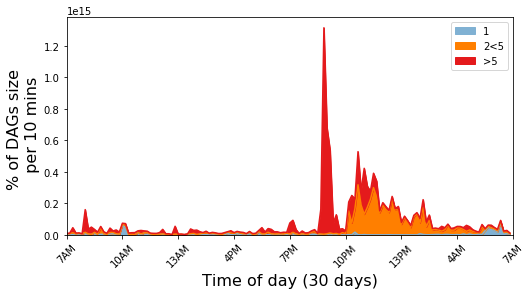

,1,2<5,>5,total,Single jobs,2 < DAG size < 5,DAG size > 5
submit_10min,,,,,,,
0,4380336745081,1670540310696,3289576316938,9340453372715,46.896404,17.885002,35.218594
1,3218012740579,3350576364113,4386285001318,10954874106010,29.375169,30.585257,40.039575
2,3528320225415,10313022000486,31694914848598,45536257074499,7.748376,22.647935,69.603689
3,3500194171280,1813511355998,6276742618763,11590448146041,30.198955,15.646603,54.154443
4,4176199371026,5465598708848,2851468640920,12493266720794,33.427601,43.748355,22.824044
...,...,...,...,...,...,...,...
139,19216190999947,6576430360864,9143805057775,34936426418586,55.003310,18.823993,26.172697
140,75680158157548,8188661080121,7942239108836,91811058346505,82.430330,8.919036,8.650635
141,14094812465337,3187342942259,6802974765953,24085130173549,58.520807,13.233655,28.245539


In [248]:
dt2 = pd.DataFrame(dag_submission_iosize).groupby('submit_10min')[['1', '2<5', '>5']].agg('sum')
dt2['total'] = dt2['1'] + dt2['2<5'] + dt2['>5']
dt2['Single jobs'] = 100*dt2['1']/dt2['total']
dt2['2 < DAG size < 5'] = 100*dt2['2<5']/dt2['total']
dt2['DAG size > 5'] = 100*dt2['>5']/dt2['total']

colors = ['#80b1d3', '#ff7f00', '#e41a1c']
fig, ax = plt.subplots(figsize=(8,4))
dt2[['1', '2<5', '>5']].plot.area(ax=ax, color=colors, stacked=True);
plt.xticks(np.arange(0, 146, 18), rotation=45)
ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_xticks10min))
#ax.set_yscale('log')
plt.xlabel("Time of day (30 days)", fontsize=16)
plt.ylabel("% of DAGs size \n per 10 mins", fontsize=16)
plt.legend()
#plt.subplots_adjust(left=0.1, bottom=0.2, right=0.96, top=0.97)
#fig.savefig('/home/maniaa/ashes/drawings/fig_dagiosizeper10min.pdf', format='pdf', dpi=200)
#fig.savefig('/home/maniaa/ashes/drawings/fig_dagiosizeper10min.png', format='png', dpi=200)
plt.show()

dt2

In [345]:
job_sz_io_sz = [];     
df.groupby('workflow.id').apply(tame_io_sizes, job_sz_io_sz)
js_is_df = pd.DataFrame(job_sz_io_sz)

js_is_df

jsg_df = pd.DataFrame();
jsg_df['Single job'] = js_is_df[js_is_df['dag_size'] == 1].groupby('input_group')['dag_size'].agg('count')
jsg_df['2 < DAGsize < 5'] = js_is_df[(js_is_df['dag_size'] > 1) & (js_is_df['dag_size'] < 5)].groupby('input_group')['dag_size'].agg('count')
jsg_df['DAGsize > 5'] = js_is_df[js_is_df['dag_size'] > 5 ].groupby('input_group')['dag_size'].agg('count')
jsg_df['1jis'] = js_is_df[js_is_df['dag_size'] == 1].groupby('input_group')['input_size'].agg('sum')
jsg_df['2<5jis'] = js_is_df[(js_is_df['dag_size'] > 1) & (js_is_df['dag_size'] < 5)].groupby('input_group')['input_size'].agg('sum')
jsg_df['jis5'] = js_is_df[js_is_df['dag_size'] > 5 ].groupby('input_group')['input_size'].agg('sum')



single, j25, j5, s1, s2, s3 = jsg_df.sum()
jsg_df['Single jobs'] = 100*jsg_df['Single job']/single
jsg_df['2 < DAG size < 5'] = 100*jsg_df['2 < DAGsize < 5']/j25
jsg_df['DAG size > 5'] = 100*jsg_df['DAGsize > 5']/j5

colors = ['#80b1d3', '#ff7f00', '#e41a1c']
fig, ax = plt.subplots(figsize=(10,4))
jsg_df[['Single jobs', '2 < DAG size < 5', 'DAG size > 5']].plot.bar(ax=ax, color=colors, width=0.9)
plt.xticks(rotation=5)
ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_xticks_iosize))
ax.set_ylim([0,100])
#ax.set_yscale('log')
plt.xlabel("Input size", fontsize=16)
plt.ylabel("% of DAGs", fontsize=16)
plt.legend()

# set individual bar lables using above list
for idx, i in enumerate(ax.patches):
    ax.text(i.get_x()+.04, i.get_height()+3, 
            format_annotation(jsg_df.iloc[idx%7, 3 + (idx//7)]),
            fontsize=11, color='#404040', rotation=rotation(i.get_height()))

print(jsg_df) 

,input_size,input_group,dag_size,submit_ts
0,24269,0,4,48.0
1,30639,0,2,66.0
2,30745,0,6,67.0
3,18616,0,6,67.0
4,18714,0,7,67.0
...,...,...,...,...
12168,557254634,2,2,114.0
12169,557254634,2,2,120.0
12170,557254634,2,2,126.0
12171,557254634,2,2,132.0


In [341]:
colors = ['#80b1d3', '#ff7f00', '#e41a1c']
fig, ax = plt.subplots(figsize=(10,4))
jsg_df[['Single jobs', '2 < DAG size < 5', 'DAG size > 5']].plot.bar(ax=ax, color=colors, width=0.9)
plt.xticks(rotation=5)
ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_xticks_iosize))
ax.set_ylim([0,100])
#ax.set_yscale('log')
plt.xlabel("Input size", fontsize=16)
plt.ylabel("% of DAGs", fontsize=16)
plt.legend()



# set individual bar lables using above list
for idx, i in enumerate(ax.patches):
    ax.text(i.get_x()+.04, i.get_height()+3, 
            format_annotation(jsg_df.iloc[idx%len(jsg_df), 3 + (idx//len(jsg_df))]) + ', ' + \
            str(jsg_df.iloc[idx%len(jsg_df), (idx//len(jsg_df))]),
            fontsize=11, color='#404040', rotation=rotation(i.get_height()))


6